# Execution file for ASSUAGE

This notebook gives an example workflow incorporating all parts of the ASSUAGE methodology.
There are three components: creating the ground truth dataset, building the surrogate model with curation and training of the ML layer, and finally integrating the PyMOS optimisation.

This code contains example ``full`` and ``reduced`` models to demonstrate the workability.
True model gives a non-linear algebraic expression dependent on the first three variables for the true fitness with an amount of randomness: true_val = 2 * var1 ** 2 + 3/2 * var2 - 4 * var3 ** (3/2) + np.random.random()/10


In [1]:
# Import any additional packages used in this jupyter notebook

import os


## Ground truth dataset creation

Code to initiate running the full model to create the ground truth data.

**User-set parameters:**
- `numNewRuns`: total number of new runs to create
- `numCoresPerSim`: maximum number of CPU cores used per simulation  
- `numCores`: total number of CPU cores available for generating the ground-truth dataset


In [2]:
os.system(f"rm -rf groundTruth surrogateCreation")

numNewRuns = 150
numCoresPerSim = 1
numCores = 10

FSItemplateFolder = os.path.join(os.getcwd(), "exampleTemplates","fullModelTemplate")

# Set parameter bounds
lowerBounds = [0.05] * 6 + [0.2] * 6 + [-0.5] * 6 + [0] * 6
upperBounds = [0.5] * 6 + [10] * 6 + [10.5] * 6 + [360] * 6
assert len(lowerBounds) == len(upperBounds), "Upper and lower bound lists must have the same length."


In [ ]:

try:
    from encoding import preprocess_parameters as preprocess_func
except:
    print("No preprocess_parameters function found in encoding file")
    preprocess_func = None

try:
    from encoding import parameter_to_model
except:
    print("No parameter_to_model function found in encoding file. This is a necessary function!!")

## Create ground truth data set
from ASSUAGE.create_ground_truth import start_new_runs
start_new_runs(numNewRuns, FSItemplateFolder, lowerBounds, upperBounds, numCoresPerSim, numCores, parameter_to_model, preprocess_func);


Starting new set of runs with first id  0
Starting simulation in run0
Starting simulation in run1
Starting simulation in run2
Starting simulation in run3
Starting simulation in run4
Starting simulation in run5
Starting simulation in run6
Starting simulation in run7
Starting simulation in run8
Starting simulation in run9
Starting simulation in run10
Starting simulation in run11
Starting simulation in run12
Starting simulation in run13
Starting simulation in run14
Starting simulation in run15
Starting simulation in run16
Starting simulation in run17
Starting simulation in run18
Starting simulation in run19
Starting simulation in run20
Starting simulation in run21
Starting simulation in run22
Starting simulation in run23
Starting simulation in run24
Starting simulation in run25
Starting simulation in run26
Starting simulation in run27
Starting simulation in run28
Starting simulation in run29
Starting simulation in run30
Starting simulation in run31
Starting simulation in run32
Starting si

### Extract data for the surrogate model from ground truth dataset

Requires two functions in encoding.py : extract_surrogate_inputs and extract_surrogate_outputs

In [ ]:
from ASSUAGE.create_ground_truth import extractData

try: 
    from encoding import extract_surrogate_inputs, extract_fitness
except:
    print("Critical surrogate input and output functions not found. Check these are defined in encoding.py")

extractData(extract_surrogate_inputs, extract_fitness);

Starting to extract data from run0
C_0    0.219
C_1    0.478
C_2    0.379
Name: 0, dtype: float64
Successfully extracted data from run0
Starting to extract data from run1
C_0    0.255
C_1    0.403
C_2    0.140
Name: 0, dtype: float64
Successfully extracted data from run1
Starting to extract data from run10
C_0    0.473
C_1    0.479
C_2    0.462
Name: 0, dtype: float64
Successfully extracted data from run10
Starting to extract data from run100
C_0    0.203
C_1    0.000
C_2    0.234
Name: 0, dtype: float64
Successfully extracted data from run100
Starting to extract data from run101
C_0    0.180
C_1    0.455
C_2    0.102
Name: 0, dtype: float64
Successfully extracted data from run101
Starting to extract data from run102
C_0    0.000
C_1    0.204
C_2    0.172
Name: 0, dtype: float64
Successfully extracted data from run102
Starting to extract data from run103
C_0    0.459
C_1    0.375
C_2    0.290
Name: 0, dtype: float64
Successfully extracted data from run103
Starting to extract data from 

Surrogate data loaded correctly.
Total NaN values: 0
Removed constant columns: []
Correlation matrix created.
Feature histograms created.
Missing values report:
    feature  n_missing  pct_missing
0        0          0          0.0
1        1          0          0.0
2        2          0          0.0
Reduced dataset shape: (150, 3)
PCA variance table created.


TypeError: close() argument must be a Figure, an int, a string, or None, not <class 'seaborn.axisgrid.PairGrid'>

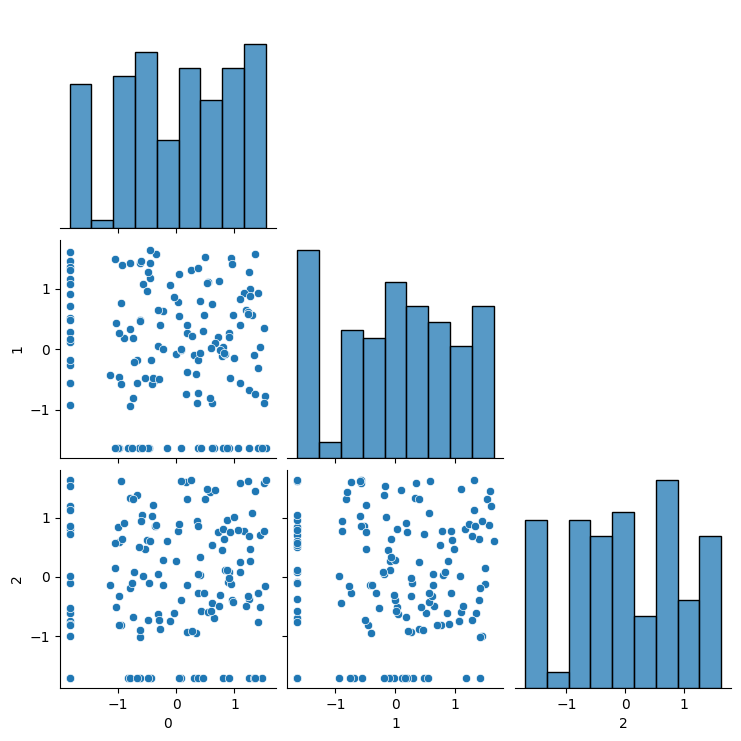

In [ ]:
from ASSUAGE.surrogateModel.data_exploration import data_exploration

explorer = data_exploration("surrogateCreation/trainingInput.csv","surrogateCreation/trainingOutput.csv")
explorer.correlation_matrix()
print("Correlation matrix created.")

explorer.feature_histograms()
print("Feature histograms created.")

missing_report = explorer.missing_value_report()
print("Missing values report:\n", missing_report.head())

reduced_data = explorer.explanatory_dimension(0.95) # PCA dimensionality reduction to preserve 95% variance
print("Reduced dataset shape:", reduced_data.shape)

# 5. PCA variance table
variance_table = explorer.explain_variance_table()
print("PCA variance table created.")

explorer.pairplot(sample=150)
print("Pairplot created (without hue).")

explorer.pairplot(sample=150, hue=0)
print("Pairplot created (with hue from output).")

outlier_mask = explorer.outlier_detection(method="zscore", thresh=3.0)
print("Outlier count:", outlier_mask.sum())

importances = explorer.feature_importance_proxy(target_column=0)
print("Top feature importances:\n", importances.head())

print("\nAll demonstration outputs written to 'surrogateCreation/'.")


----------------------------

Evaluating models for input data: 
Fitting model: Linear Regression
Fitting model: Support Vector Regressor
Fitting model: Ridge
Fitting model: Lasso
Fitting model: Bayesian Ridge
Fitting model: Decision Tree
Fitting model: Random Forest


/home/lizzi/.pyenv/versions/lurtisEnv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/lizzi/.pyenv/versions/lurtisEnv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/lizzi/.pyenv/versions/lurtisEnv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/lizzi/.pyenv/versions/lurtisEnv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/lizzi/.pyenv/versions/lurtisEnv/lib/python3.10/site-packages/sklearn/m

Fitting model: XGBoost


/home/lizzi/.pyenv/versions/lurtisEnv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/lizzi/.pyenv/versions/lurtisEnv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/lizzi/.pyenv/versions/lurtisEnv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/lizzi/.pyenv/versions/lurtisEnv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/lizzi/.pyenv/versions/lurtisEnv/lib/python3.10/site-packages/sklearn/m

Fitting model: Gradient Boost
No models exceeded R^2 > 0.9

----------------------------



ValueError: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=5.

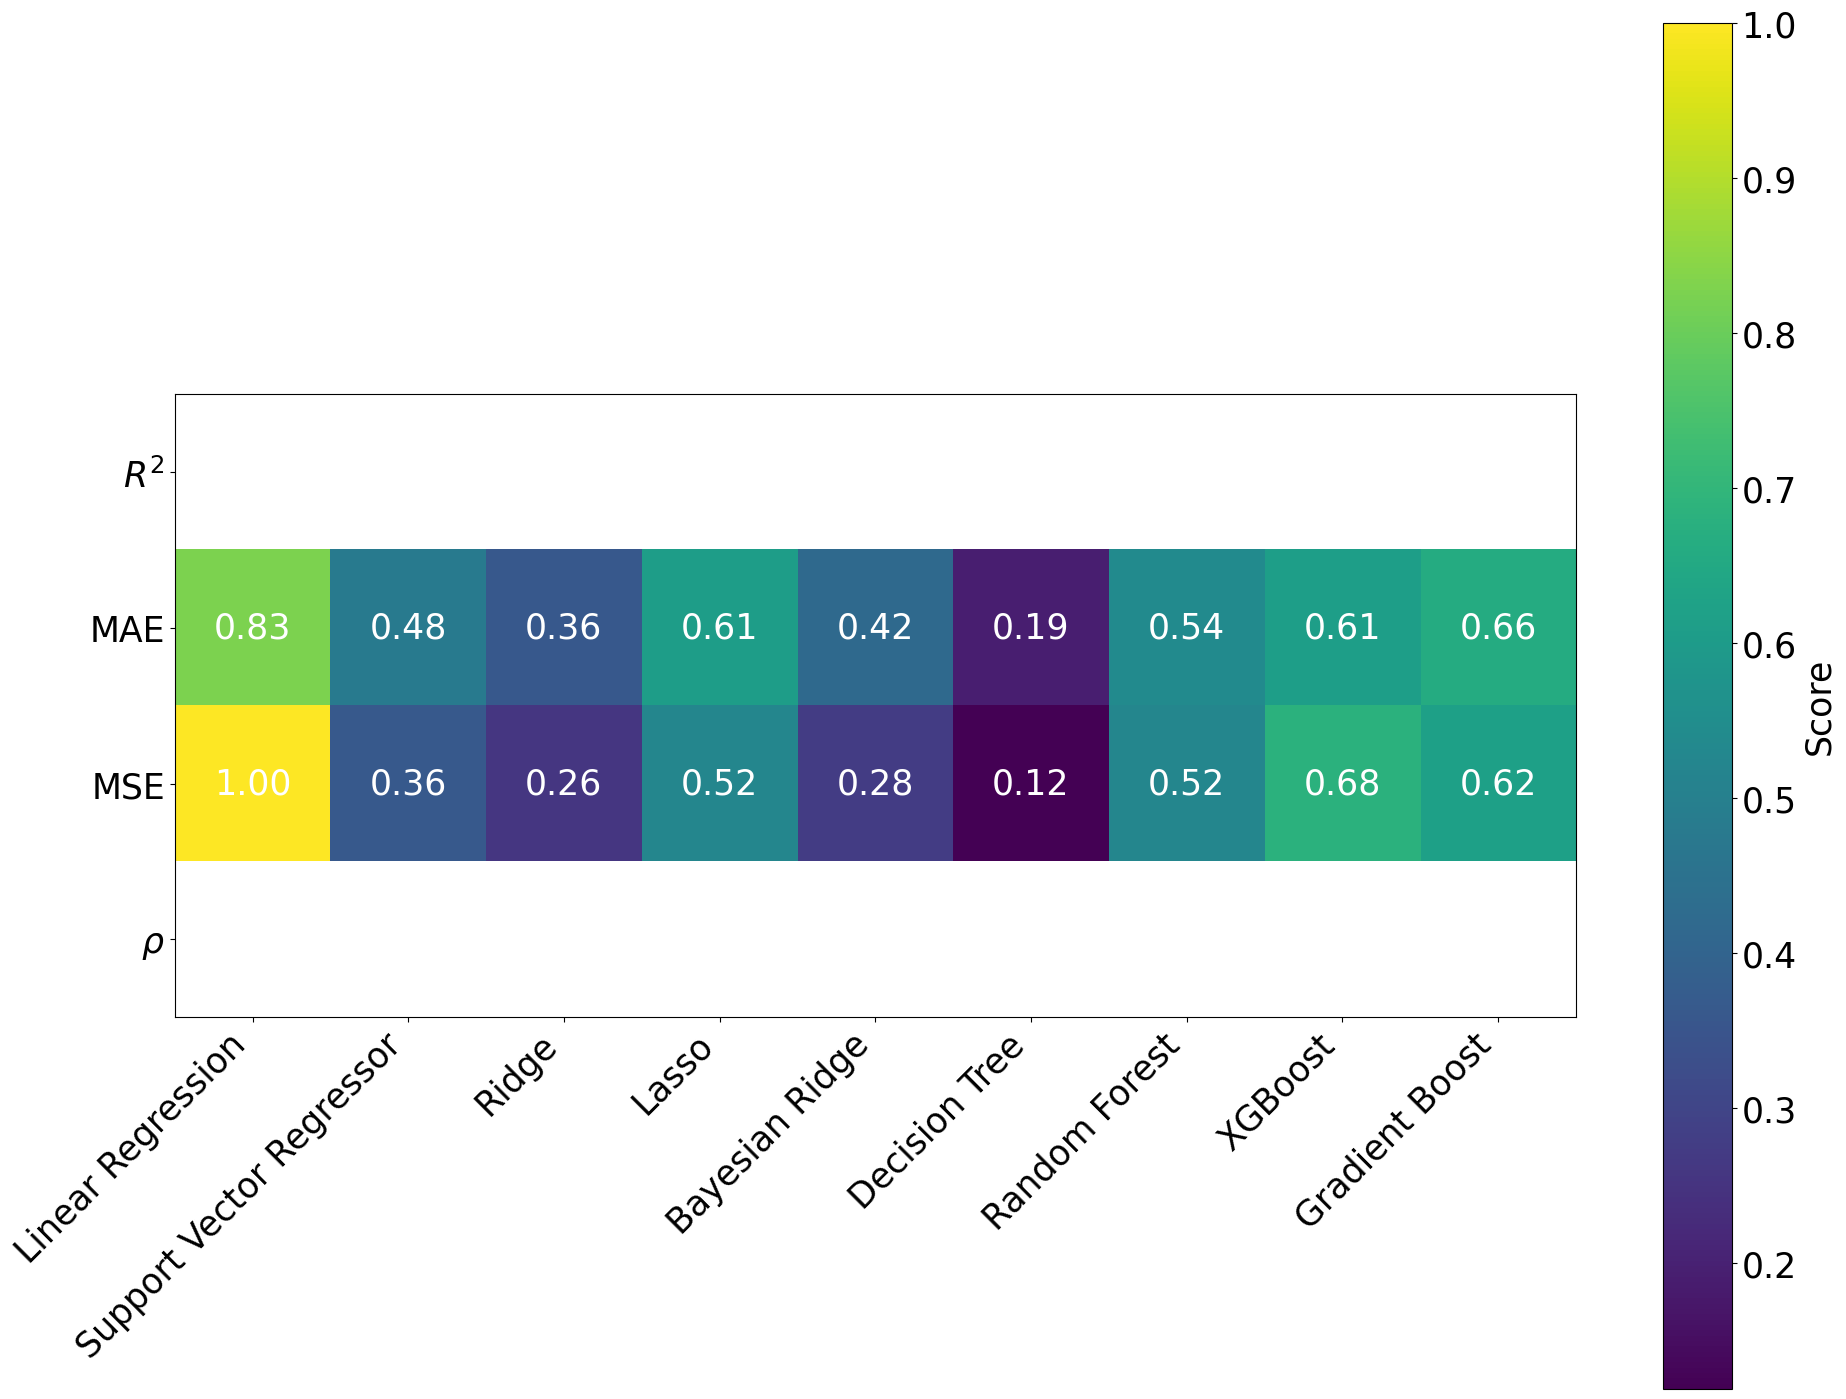

In [ ]:
from ASSUAGE.surrogateModel.mlModelFitting import mlModels

m = mlModels("surrogateCreation/trainingInput.csv","surrogateCreation/trainingOutput.csv")
good_models = m.select_promising_ml_models(accuracy_cutoff=0.9);
m.hyperparameter_optimisation(good_models);
m.train_best_model();
